**Author:** Lisa Wallner  
**Description:**  
 

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [754]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns

## Dataframe df_llama  
This dataframe gives an overview of the evaluation results from the original and genearted READMES (generated by llama3.1-8b). The scoring was created with three different kind of llms - llama3.1-8b, reka-flash & jamba-1.5-mini.

### Universal Functions

In [755]:
def exclude_repos(df):
    repos_exclude = [('diego-vicente', 'som-tsp'), ('Taniiishk', 'Rock-Paper-Scissors-Game'), ('langchain', 'ai_local-deep-researcher_output')]
    # ('langchain', 'ai_local-deep-researcher_output')
    df = df[~df.set_index(['repo_owner', 'repo_name']).index.isin(repos_exclude)] 

    return df

In [756]:
def remove_cols(df):
    df = df.drop(['readme_g_score', 'readme_g_score_q1_txt', 'readme_g_score_q2_txt', 'readme_g_score_q3_txt', 'readme_g_score_q4_txt', 'readme_g_score_q5_txt', 'readme_o_score', 'readme_o_score_q1_txt', 'readme_o_score_q2_txt', 'readme_o_score_q3_txt', 'readme_o_score_q4_txt', 'readme_o_score_q5_txt'], axis=1)

    return df

In [757]:
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

### Model 1

In [758]:
model = 'model1'
path = f'../data/df_score_lama/df_score_{model}_manuel.json'

In [759]:
df_1 = load_data(path)

During the process there are some repositories found which can not be used because of inconsistence in the data. These repository data will be filterd out.  
+ diego-vicente: som-tsp --> GitHub repository has no README file
+ Taniiishk: Rock-Paper-Scissors-Game --> GitHub repository has no license

In [760]:
len(df_1)

201

In [761]:
df_1.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,keras-rl,keras-rl,"### ""q1"": [\n ##""score"": 5##,\n ##""expla...",5,The README clearly states that the project is ...,5,The README clearly explains that the project i...,4,The README provides a clear example code to ge...,2,...,5,The goal of the project is clearly stated in t...,5,The project is useful because it provides a se...,4,The README provides a clear installation guide...,5,The README provides several ways for users to ...,5,The README clearly states that the project is ...
1,terraform-compliance,cli,"### ""q1"": [ \n ##""score"": 5##,\n ##""expl...",5,"The project's goal is clearly stated in the ""D...",5,The project is useful because it provides a BD...,4,The README provides a clear step-by-step guide...,2,...,5,The goal of the project is clearly stated in t...,5,The README clearly explains why the project is...,4,The README provides a clear installation guide...,5,The README provides several ways for users to ...,5,The README clearly states that the project is ...


In [762]:
df_1 = exclude_repos(df_1)

In [763]:
len(df_1)

199

For the final dataframe not all columns are required. Dispensable columns are removed to keep the dataframe clean.

In [764]:
df_1 = remove_cols(df_1)

In [765]:
df_1.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,readme_o_score_q1,readme_o_score_q2,readme_o_score_q3,readme_o_score_q4,readme_o_score_q5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.542714,4.577889,4.316583,2.135678,2.266332,4.693467,4.743719,4.296482,4.221106,4.311558
std,0.686769,0.740402,0.581948,0.701142,0.950503,0.798678,0.703274,0.743686,1.133225,1.264678
min,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,4.000000,2.000000,2.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Model 2

In [766]:
model = 'model2'
path = f'../data/df_score_lama/df_score_{model}_manuel.json'

In [767]:
df_2 = load_data(path)

In [768]:
len(df_2)

201

In [769]:
df_2.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,keras-rl,keras-rl,"###\n""q1"": [\n ""score"": 4,\n ""explanati...",4,The README clearly states the goal of the proj...,3,The usefulness of the project is hinted at by ...,4,The README offers a clear guide on how to get ...,2,...,5,The README clearly states the goal of the proj...,4,The project is useful because it provides a st...,5,Users can get started with the project very ea...,4,Users can get help through several channels: f...,4,The README mentions that the project is mainta...
1,terraform-compliance,cli,"###\n""q1"": [\n ""score"": 4,\n ""explanati...",4,The README clearly states that the project is ...,3,The usefulness of the project is implied by it...,5,The README provides clear and detailed instruc...,2,...,5,The README clearly states the goal of the proj...,5,The project's usefulness is well-explained thr...,4,Users can get started with the project by foll...,3,Help resources are mentioned through links to ...,3,The README mentions the project maintainer (ee...


In [770]:
df_2 = exclude_repos(df_2)

In [771]:
len(df_2)

199

In [772]:
df_2 = remove_cols(df_2)

In [773]:
df_2.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,readme_o_score_q1,readme_o_score_q2,readme_o_score_q3,readme_o_score_q4,readme_o_score_q5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.346734,3.432161,4.663317,2.331658,3.211055,4.758794,4.537688,4.693467,4.020101,4.206030
std,0.546224,0.545108,0.514645,0.513015,0.508194,0.561483,0.701612,0.620775,0.893070,0.786736
min,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,4.000000,3.000000,4.000000,2.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000
50%,4.000000,3.000000,5.000000,2.000000,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Model 3

In [774]:
model = 'model3'
path = f'../data/df_score_lama/df_score_{model}_manuel.json'

In [775]:
df_3 = load_data(path)

In [776]:
len(df_3)

201

In [777]:
df_3.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,keras-rl,keras-rl,"###\n""q1"": [\n ""score"": 4,\n ""explanati...",4,The goal of the project is clearly stated in t...,5,The project's usefulness is well-explained in ...,3,"While the installation instructions are clear,...",3,...,5,The goal of the project is clearly stated in t...,5,The project is useful because it provides a li...,5,The README provides clear instructions on how ...,5,The README provides information on where users...,5,The README provides information on who maintai...
1,terraform-compliance,cli,"###\n""q1"": [\n ""score"": 5,\n ""explanati...",5,The goal of the project is clearly stated in t...,5,The project's usefulness is evident from its d...,4,The installation instructions are clear and co...,3,...,5,The goal of the project is clearly stated in t...,5,The project's usefulness is well explained. It...,5,"Getting started is explained in the ""Installat...",5,Help is readily available through the provided...,5,The project's maintenance and contribution det...


In [778]:
df_3 = exclude_repos(df_3)

In [779]:
len(df_3)

199

In [780]:
df_3 = remove_cols(df_3)

In [781]:
df_3.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,readme_o_score_q1,readme_o_score_q2,readme_o_score_q3,readme_o_score_q4,readme_o_score_q5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.793970,4.834171,4.361809,3.698492,4.241206,4.929648,4.849246,4.552764,4.281407,4.633166
std,0.474356,0.479518,0.710490,1.123463,0.949274,0.369378,0.468597,0.624403,0.969852,0.766143
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,3.000000,3.000000,5.000000,5.000000,4.000000,3.000000,5.000000
50%,5.000000,5.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Final Dataframe - df_llama

Create Dataframe for the scoring data of 199 GitHub repositories and the three evaluation models lama3.1-8b, reka-flash and jamba-1.5-mini.

In [782]:
cols = ['repo_owner', 'repo_name', 'model_type', 'total_score_g', 'score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']
df_llama = pd.DataFrame(columns=cols)

In [783]:
dfs = [df_1, df_2, df_3]
model_types = ['llama3.1-8b', 'reka-flash', 'jamba-1.5-mini']

In [784]:
for idx, df in enumerate(dfs):
    model_type = model_types[idx]
    
    for _,row in df.iterrows():
        new_row = {
            'repo_owner': row['repo_owner'], 
            'repo_name': row['repo_name'], 
            'model_type': model_type, 
            'total_score_g': np.nan, 
            'score_q1_g': row['readme_g_score_q1'], 
            'score_q2_g': row['readme_g_score_q2'], 
            'score_q3_g': row['readme_g_score_q3'], 
            'score_q4_g': row['readme_g_score_q4'], 
            'score_q5_g': row['readme_g_score_q5'], 
            'total_score_o': np.nan, 
            'score_q1_o': row['readme_o_score_q1'], 
            'score_q2_o': row['readme_o_score_q2'], 
            'score_q3_o': row['readme_o_score_q3'], 
            'score_q4_o': row['readme_o_score_q4'], 
            'score_q5_o': row['readme_o_score_q5']
    }
        df_llama = pd.concat([df_llama, pd.DataFrame([new_row])], ignore_index=True)

Calculate the total score for the genearted and orginal README's.

In [785]:
df_llama['total_score_g'] = df_llama[['score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g']].sum(axis=1).astype(int)
df_llama['total_score_o'] = df_llama[['score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']].sum(axis=1).astype(int)

In [786]:
df_llama

,repo_owner,repo_name,model_type,total_score_g,score_q1_g,score_q2_g,score_q3_g,score_q4_g,score_q5_g,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,keras-rl,keras-rl,llama3.1-8b,18,5,5,4,2,2,24,5,5,4,5,5
1,terraform-compliance,cli,llama3.1-8b,18,5,5,4,2,2,24,5,5,4,5,5
2,openstack,openstack,llama3.1-8b,18,5,4,5,2,2,20,4,5,2,5,4
3,OlafenwaMoses,ImageAI,llama3.1-8b,18,5,4,5,2,2,23,4,5,4,5,5
4,Bitwise-01,Instagram-,llama3.1-8b,18,5,4,5,2,2,19,4,4,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,Shubhamsaboo,awesome-llm-apps,jamba-1.5-mini,19,4,4,5,3,3,25,5,5,5,5,5
593,databrickslabs,dolly,jamba-1.5-mini,20,5,5,4,3,3,21,5,4,5,3,4
594,Genesis-Embodied-AI,Genesis,jamba-1.5-mini,22,5,5,4,3,5,24,5,5,4,5,5
595,Anjok07,ultimatevocalremovergui,jamba-1.5-mini,25,5,5,5,5,5,22,5,5,4,3,5


In [787]:
df_llama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repo_owner     597 non-null    object
 1   repo_name      597 non-null    object
 2   model_type     597 non-null    object
 3   total_score_g  597 non-null    int64 
 4   score_q1_g     597 non-null    object
 5   score_q2_g     597 non-null    object
 6   score_q3_g     597 non-null    object
 7   score_q4_g     597 non-null    object
 8   score_q5_g     597 non-null    object
 9   total_score_o  597 non-null    int64 
 10  score_q1_o     597 non-null    object
 11  score_q2_o     597 non-null    object
 12  score_q3_o     597 non-null    object
 13  score_q4_o     597 non-null    object
 14  score_q5_o     597 non-null    object
dtypes: int64(2), object(13)
memory usage: 70.1+ KB


In [788]:
# df_llama['total_score_o'][df_llama['model_type'] == 'llama3.1-8b'].value_counts()

## Dataframe df_llama_com  
This dataframe contains the compressed results from df_llama restricted on the total scores.

In [789]:
df_llama_tmp = df_llama[['repo_owner', 'repo_name', 'total_score_g', 'total_score_o', 'model_type']] # 'score_g', 'score_o', 'subsummary', 'subsummary_cnt']]

Add column with ids.

In [790]:
df_llama_tmp['id'] = df_llama_tmp['repo_owner'] + '_' + df_llama_tmp['repo_name']

/tmp/ipykernel_793/1442397247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_tmp['id'] = df_llama_tmp['repo_owner'] + '_' + df_llama_tmp['repo_name']


In [791]:
df_llama_tmp[df_llama_tmp['repo_name'] == 'keras-rl']
# 'keras-rl'

,repo_owner,repo_name,total_score_g,total_score_o,model_type,id
0,keras-rl,keras-rl,18,24,llama3.1-8b,keras-rl_keras-rl
199,keras-rl,keras-rl,16,22,reka-flash,keras-rl_keras-rl
398,keras-rl,keras-rl,18,25,jamba-1.5-mini,keras-rl_keras-rl


In [792]:
df_llama_tmp

,repo_owner,repo_name,total_score_g,total_score_o,model_type,id
0,keras-rl,keras-rl,18,24,llama3.1-8b,keras-rl_keras-rl
1,terraform-compliance,cli,18,24,llama3.1-8b,terraform-compliance_cli
2,openstack,openstack,18,20,llama3.1-8b,openstack_openstack
3,OlafenwaMoses,ImageAI,18,23,llama3.1-8b,OlafenwaMoses_ImageAI
4,Bitwise-01,Instagram-,18,19,llama3.1-8b,Bitwise-01_Instagram-
...,...,...,...,...,...,...
592,Shubhamsaboo,awesome-llm-apps,19,25,jamba-1.5-mini,Shubhamsaboo_awesome-llm-apps
593,databrickslabs,dolly,20,21,jamba-1.5-mini,databrickslabs_dolly
594,Genesis-Embodied-AI,Genesis,22,24,jamba-1.5-mini,Genesis-Embodied-AI_Genesis
595,Anjok07,ultimatevocalremovergui,25,22,jamba-1.5-mini,Anjok07_ultimatevocalremovergui


In [793]:
df_llama_tmp[df_llama_tmp['repo_name'] == 'openstack']

,repo_owner,repo_name,total_score_g,total_score_o,model_type,id
2,openstack,openstack,18,20,llama3.1-8b,openstack_openstack
201,openstack,openstack,17,20,reka-flash,openstack_openstack
400,openstack,openstack,25,18,jamba-1.5-mini,openstack_openstack


Calculate mean of score values.

In [794]:
# rows are grouped by 'id'
# mean!
# old -->
                # then an aggregation mode is applied on the columns 'total_score_g' & 'total_score_o'
                # with .iloc[0] the first value of x.mode() is taken (mode() can return multiple results) (if 2/3 llms gave the same score, take this)
                # if there are only unique values in x.mode() the mean value should be calcualted instead
                # len(x.unique()) == 3 checks if x.unique() contains 3 different values, if yes, mean() will called
                #     s = pd.Series([19, 18, 1])
                #     s_u = s.unique()
                #     print(s_u)
                #     if len(s_u) == 0:
                #         print('empty')
# <-- old
# .reset_index() --> prepare index of current df for merging into another df
# .rename() --> customise name of column which holds the results of the aggregation
df_tmp_g = df_llama_tmp.groupby('id')['total_score_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_g': 'score_g'})
df_tmp_o = df_llama_tmp.groupby('id')['total_score_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_o': 'score_o'})

# merge df_tmp_o & df_tmp_g by key 'id' to df_llama_tmp
df_llama_tmp = df_llama_tmp.merge(df_tmp_g, on='id', how='left') \
                           .merge(df_tmp_o, on='id', how='left')

Remove duplicate rows.

In [795]:
df_llama_tmp = df_llama_tmp[~df_llama_tmp['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [796]:
df_llama_com = df_llama_tmp[['id','repo_owner', 'repo_name', 'score_g', 'score_o']]

### *Additional dataframe with the total score and the score by each single question*

In [797]:
df_llama_tmp2 = df_llama.copy()
df_llama_tmp2['id'] = df_llama_tmp2['repo_owner'] + '_' + df_llama_tmp2['repo_name']

In [798]:
df_llama_tmp2[df_llama_tmp2['repo_name'] == 'keras-rl']

,repo_owner,repo_name,model_type,total_score_g,score_q1_g,score_q2_g,score_q3_g,score_q4_g,score_q5_g,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o,id
0,keras-rl,keras-rl,llama3.1-8b,18,5,5,4,2,2,24,5,5,4,5,5,keras-rl_keras-rl
199,keras-rl,keras-rl,reka-flash,16,4,3,4,2,3,22,5,4,5,4,4,keras-rl_keras-rl
398,keras-rl,keras-rl,jamba-1.5-mini,18,4,5,3,3,3,25,5,5,5,5,5,keras-rl_keras-rl


In [799]:
df_tmp2_g_1 = df_llama_tmp2.groupby('id')['score_q1_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_g': 'score_q1_g_1'})
df_tmp2_g_2 = df_llama_tmp2.groupby('id')['score_q2_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_g': 'score_q2_g_2'})
df_tmp2_g_3 = df_llama_tmp2.groupby('id')['score_q3_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_g': 'score_q3_g_3'})
df_tmp2_g_4 = df_llama_tmp2.groupby('id')['score_q4_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_g': 'score_q4_g_4'})
df_tmp2_g_5 = df_llama_tmp2.groupby('id')['score_q5_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_g': 'score_q5_g_5'})

df_tmp2_o_1 = df_llama_tmp2.groupby('id')['score_q1_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_o': 'score_q1_o_1'})
df_tmp2_o_2 = df_llama_tmp2.groupby('id')['score_q2_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_o': 'score_q2_o_2'})
df_tmp2_o_3 = df_llama_tmp2.groupby('id')['score_q3_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_o': 'score_q3_o_3'})
df_tmp2_o_4 = df_llama_tmp2.groupby('id')['score_q4_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_o': 'score_q4_o_4'})
df_tmp2_o_5 = df_llama_tmp2.groupby('id')['score_q5_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_o': 'score_q5_o_5'})

df_llama_tmp2 = df_llama_tmp2.merge(df_tmp2_g_1, on='id', how='left') \
                           .merge(df_tmp2_g_2, on='id', how='left') \
                           .merge(df_tmp2_g_3, on='id', how='left') \
                           .merge(df_tmp2_g_4, on='id', how='left') \
                           .merge(df_tmp2_g_5, on='id', how='left') \
                           .merge(df_tmp2_o_1, on='id', how='left') \
                           .merge(df_tmp2_o_2, on='id', how='left') \
                           .merge(df_tmp2_o_3, on='id', how='left') \
                           .merge(df_tmp2_o_4, on='id', how='left') \
                           .merge(df_tmp2_o_5, on='id', how='left') 

In [800]:
df_llama_tmp2 = df_llama_tmp2.drop(['score_q1_g', 'score_q2_g','score_q3_g','score_q4_g', 'score_q5_g','score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o'], axis=1)

In [801]:
df_llama_tmp2[df_llama_tmp2['repo_name'] == 'keras-rl']

,repo_owner,repo_name,model_type,total_score_g,total_score_o,id,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,keras-rl,keras-rl,llama3.1-8b,18,24,keras-rl_keras-rl,4.333333,4.333333,3.666667,2.333333,2.666667,5.0,4.666667,4.666667,4.666667,4.666667
199,keras-rl,keras-rl,reka-flash,16,22,keras-rl_keras-rl,4.333333,4.333333,3.666667,2.333333,2.666667,5.0,4.666667,4.666667,4.666667,4.666667
398,keras-rl,keras-rl,jamba-1.5-mini,18,25,keras-rl_keras-rl,4.333333,4.333333,3.666667,2.333333,2.666667,5.0,4.666667,4.666667,4.666667,4.666667


In [802]:
df_llama_tmp2 = df_llama_tmp2[~df_llama_tmp2['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [803]:
df_llama_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 198
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   repo_owner     199 non-null    object 
 1   repo_name      199 non-null    object 
 2   model_type     199 non-null    object 
 3   total_score_g  199 non-null    int64  
 4   total_score_o  199 non-null    int64  
 5   id             199 non-null    object 
 6   score_q1_g_1   199 non-null    float64
 7   score_q2_g_2   199 non-null    float64
 8   score_q3_g_3   199 non-null    float64
 9   score_q4_g_4   199 non-null    float64
 10  score_q5_g_5   199 non-null    float64
 11  score_q1_o_1   199 non-null    float64
 12  score_q2_o_2   199 non-null    float64
 13  score_q3_o_3   199 non-null    float64
 14  score_q4_o_4   199 non-null    float64
 15  score_q5_o_5   199 non-null    float64
dtypes: float64(10), int64(2), object(4)
memory usage: 26.4+ KB


Visualize the compressed score for each question.

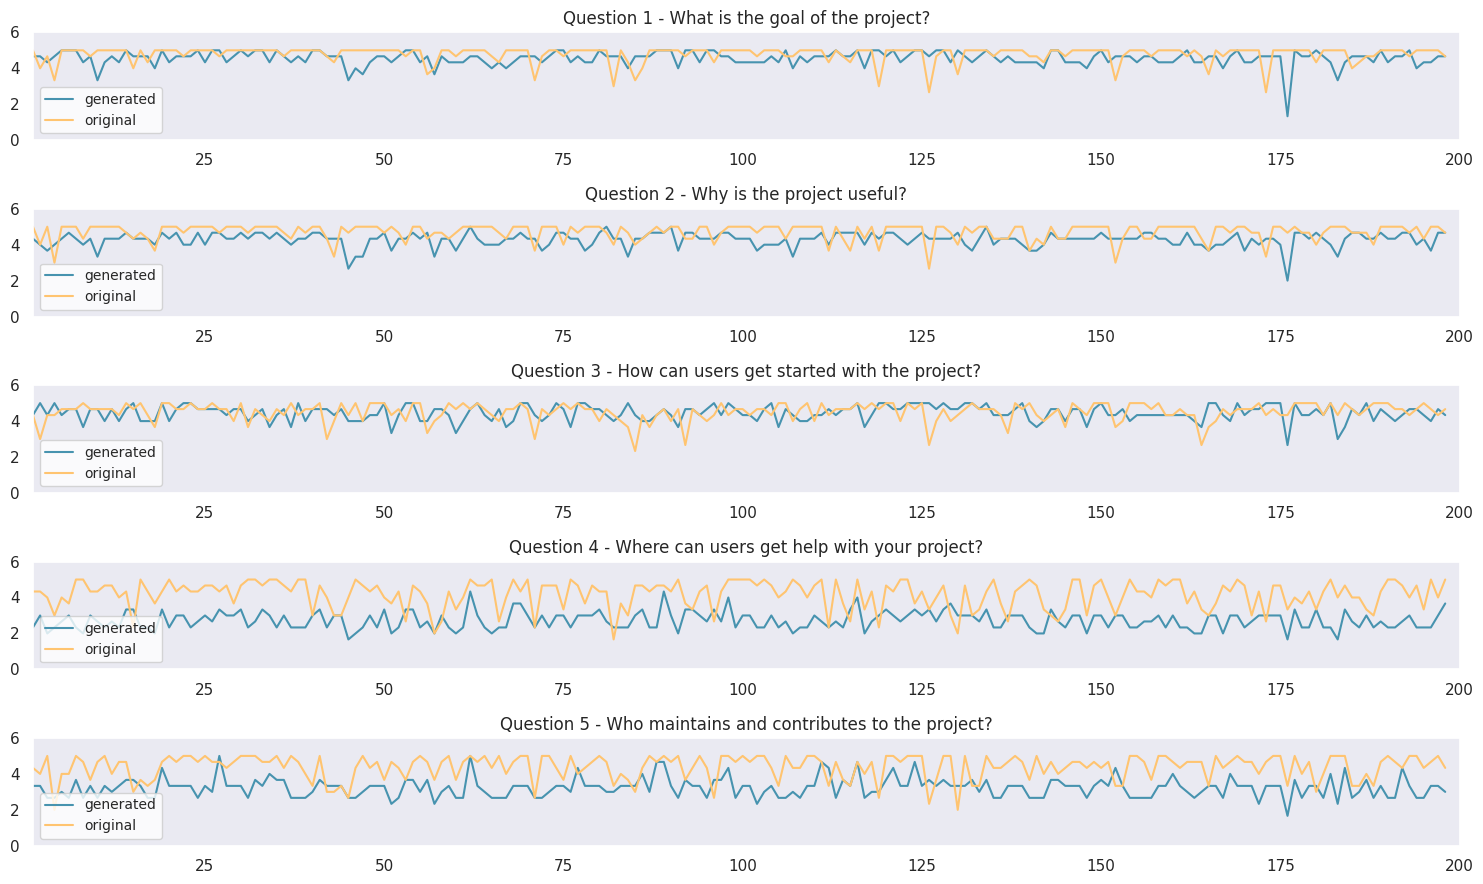

In [804]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 9)) # create a figure and define size of plot

    # generated
    q1_g = df_llama_tmp2['score_q1_g_1']
    q2_g = df_llama_tmp2['score_q2_g_2']
    q3_g = df_llama_tmp2['score_q3_g_3']
    q4_g = df_llama_tmp2['score_q4_g_4']
    q5_g = df_llama_tmp2['score_q5_g_5']
    # origignal
    q1_o = df_llama_tmp2['score_q1_o_1']
    q2_o = df_llama_tmp2['score_q2_o_2']
    q3_o = df_llama_tmp2['score_q3_o_3']
    q4_o = df_llama_tmp2['score_q4_o_4']
    q5_o = df_llama_tmp2['score_q5_o_5']

    ax[0].plot(q1_g, label='generated', color='#4793AF')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?')
    ax[0].legend(loc=3, fontsize=10, facecolor='white')
    ax[0].set_xlim(1,200)
    ax[0].set_ylim(0,6)

    ax[1].plot(q2_g, label='generated', color='#4793AF')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?')
    ax[1].legend(loc=3, fontsize=10, facecolor='white')
    ax[1].set_xlim(1,200)
    ax[1].set_ylim(0,6)

    ax[2].plot(q3_g, label='generated', color='#4793AF')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?')
    ax[2].legend(loc=3, fontsize=10, facecolor='white')
    ax[2].set_xlim(1,200)
    ax[2].set_ylim(0,6)

    ax[3].plot(q4_g, label='generated', color='#4793AF')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?')
    ax[3].legend(loc=3, fontsize=10, facecolor='white')
    ax[3].set_xlim(1,200)
    ax[3].set_ylim(0,6)

    ax[4].plot(q5_g, label='generated', color='#4793AF')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?')
    ax[4].legend(loc=3, fontsize=10, facecolor='white')
    ax[4].set_xlim(1,200)
    ax[4].set_ylim(0,6)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [805]:
df_llama_tmp2.describe()

,total_score_g,total_score_o,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,17.839196,22.266332,4.561139,4.281407,4.447236,2.721943,3.239531,4.793970,4.710218,4.514238,4.174204,4.383585
std,2.362218,3.327938,0.409658,0.400736,0.439852,0.490955,0.543424,0.447574,0.448594,0.506627,0.777651,0.683901
min,9.000000,6.000000,1.333333,2.000000,2.666667,1.666667,1.666667,2.666667,2.666667,2.333333,1.666667,2.000000
25%,17.000000,21.000000,4.333333,4.000000,4.333333,2.333333,2.666667,4.666667,4.666667,4.333333,3.666667,4.000000
50%,18.000000,24.000000,4.666667,4.333333,4.333333,2.666667,3.333333,5.000000,5.000000,4.666667,4.333333,4.666667
75%,18.000000,24.000000,4.666667,4.666667,4.666667,3.000000,3.333333,5.000000,5.000000,5.000000,4.666667,5.000000
max,24.000000,25.000000,5.000000,5.000000,5.000000,4.333333,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### README's with summaries and subsummaries

In [806]:
df_llama_com['subsummary'] = 0
df_llama_com['summary_cnt'] = 0

/tmp/ipykernel_793/2102315245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_com['subsummary'] = 0
/tmp/ipykernel_793/2102315245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_com['summary_cnt'] = 0


In [807]:
df_llama_com

,id,repo_owner,repo_name,score_g,score_o,subsummary,summary_cnt
0,keras-rl_keras-rl,keras-rl,keras-rl,17.333333,23.666667,0,0
1,terraform-compliance_cli,terraform-compliance,cli,19.000000,23.000000,0,0
2,openstack_openstack,openstack,openstack,20.000000,19.333333,0,0
3,OlafenwaMoses_ImageAI,OlafenwaMoses,ImageAI,17.000000,23.000000,0,0
4,Bitwise-01_Instagram-,Bitwise-01,Instagram-,18.666667,15.666667,0,0
...,...,...,...,...,...,...,...
194,Shubhamsaboo_awesome-llm-apps,Shubhamsaboo,awesome-llm-apps,17.666667,24.333333,0,0
195,databrickslabs_dolly,databrickslabs,dolly,18.000000,22.000000,0,0
196,Genesis-Embodied-AI_Genesis,Genesis-Embodied-AI,Genesis,17.666667,24.333333,0,0
197,Anjok07_ultimatevocalremovergui,Anjok07,ultimatevocalremovergui,20.333333,23.333333,0,0


Get information about summaries.

In [808]:
for idx, row in df_llama_com.iterrows():
    id = row['id']
    path = f'../data/output_readme_data_lama/{id}_output.json'

    with open(path, 'r') as f:
        loaded_data = json.load(f)

    subsummaries_cnt = len(loaded_data['summaries'])

    df_llama_com.loc[idx, 'subsummary'] = 1 if subsummaries_cnt > 1 else 0
    df_llama_com.loc[idx, 'summary_cnt'] = subsummaries_cnt

In [809]:
df_llama_com.describe()

,score_g,score_o,subsummary,summary_cnt
count,199.000000,199.000000,199.000000,199.00000
mean,19.251256,22.576214,0.351759,4.80402
std,1.802999,2.247501,0.478723,6.88042
min,9.333333,13.666667,0.000000,1.00000
25%,18.166667,21.666667,0.000000,1.00000
50%,19.333333,23.333333,0.000000,1.00000
75%,20.333333,24.333333,1.000000,6.50000
max,23.666667,25.000000,1.000000,46.00000


## Dataframe df_llama_o  
This dataframe contains the scoring for the original README files with addtional information about the GitHub repository.

In [810]:
df_llama_o = df_llama_com[['id', 'repo_owner', 'repo_name', 'score_o']]

In [811]:
df_meta = load_data(path='../data/df_repos_sample_250.json')

In [812]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 250 non-null    int64  
 1   name               250 non-null    object 
 2   full_name          250 non-null    object 
 3   html_url           250 non-null    object 
 4   description        250 non-null    object 
 5   url                250 non-null    object 
 6   labels_url         250 non-null    object 
 7   created_at         250 non-null    object 
 8   updated_at         250 non-null    object 
 9   pushed_at          250 non-null    object 
 10  size               250 non-null    int64  
 11  stargazers_count   250 non-null    int64  
 12  watchers_count     250 non-null    int64  
 13  language           250 non-null    object 
 14  has_issues         250 non-null    bool   
 15  has_projects       250 non-null    bool   
 16  has_downloads      250 non

In [813]:
df_meta['id_name'] = df_meta['full_name'].apply(lambda x: x.replace('/', '_'))

In [814]:
df_meta_com = df_meta[['id_name', 'stargazers_count', 'forks_count', 'license_type']]
df_meta_com = df_meta_com.rename(columns={'id_name': 'id'})

In [815]:
df_meta_com.head(3)

,id,stargazers_count,forks_count,license_type
0,pydantic_logfire,2970,110,mit
1,mem0ai_mem0,27455,2612,apache-2.0
2,taki0112_Tensorflow-Cookbook,2772,469,mit


In the next step the relevant metadata will be joined to the dataframe df_llama_o.

In [816]:
df_llama_o = df_llama_o.merge(df_meta_com, on='id', how='left')

In [817]:
df_llama_o[df_llama_o['repo_owner'] == 'langchain']

,id,repo_owner,repo_name,score_o,stargazers_count,forks_count,license_type


Line plot with score_o, stargazers_count, forks_count

In [818]:
df_plot = df_llama_o[['id', 'score_o', 'stargazers_count', 'forks_count']]

In [819]:
df_plot[df_plot['stargazers_count'].isna()]

,id,score_o,stargazers_count,forks_count
50,langchain-ai_local-deep-researcher,22.333333,NaN,NaN


In [820]:
df_plot.describe()

,score_o,stargazers_count,forks_count
count,199.000000,198.000000,198.000000
mean,22.576214,14680.232323,1983.141414
std,2.247501,13981.559745,2429.022899
min,13.666667,71.000000,32.000000
25%,21.666667,5167.000000,558.250000
50%,23.333333,10141.500000,1185.500000
75%,24.333333,20084.750000,2322.000000
max,25.000000,76734.000000,15231.000000


In [821]:
y_star = df_plot.sort_values('stargazers_count', ascending=False)

In [822]:
y_star

,id,score_o,stargazers_count,forks_count
168,3b1b_manim,23.000000,76734.0,6651.0
56,swisskyrepo_PayloadsAllTheThings,19.666667,64599.0,15231.0
25,sherlock-project_sherlock,24.333333,63602.0,7356.0
107,zylon-ai_private-gpt,23.000000,55613.0,7452.0
175,browser-use_browser-use,24.000000,55437.0,5937.0
...,...,...,...,...
119,realpython_cookiecutter-flask-skeleton,16.333333,435.0,137.0
124,majumderb_rezero,23.333333,407.0,53.0
53,mikelzc1990_nsganetv2,19.000000,155.0,36.0
57,awslabs_aws-config-to-elasticsearch,18.333333,71.0,32.0


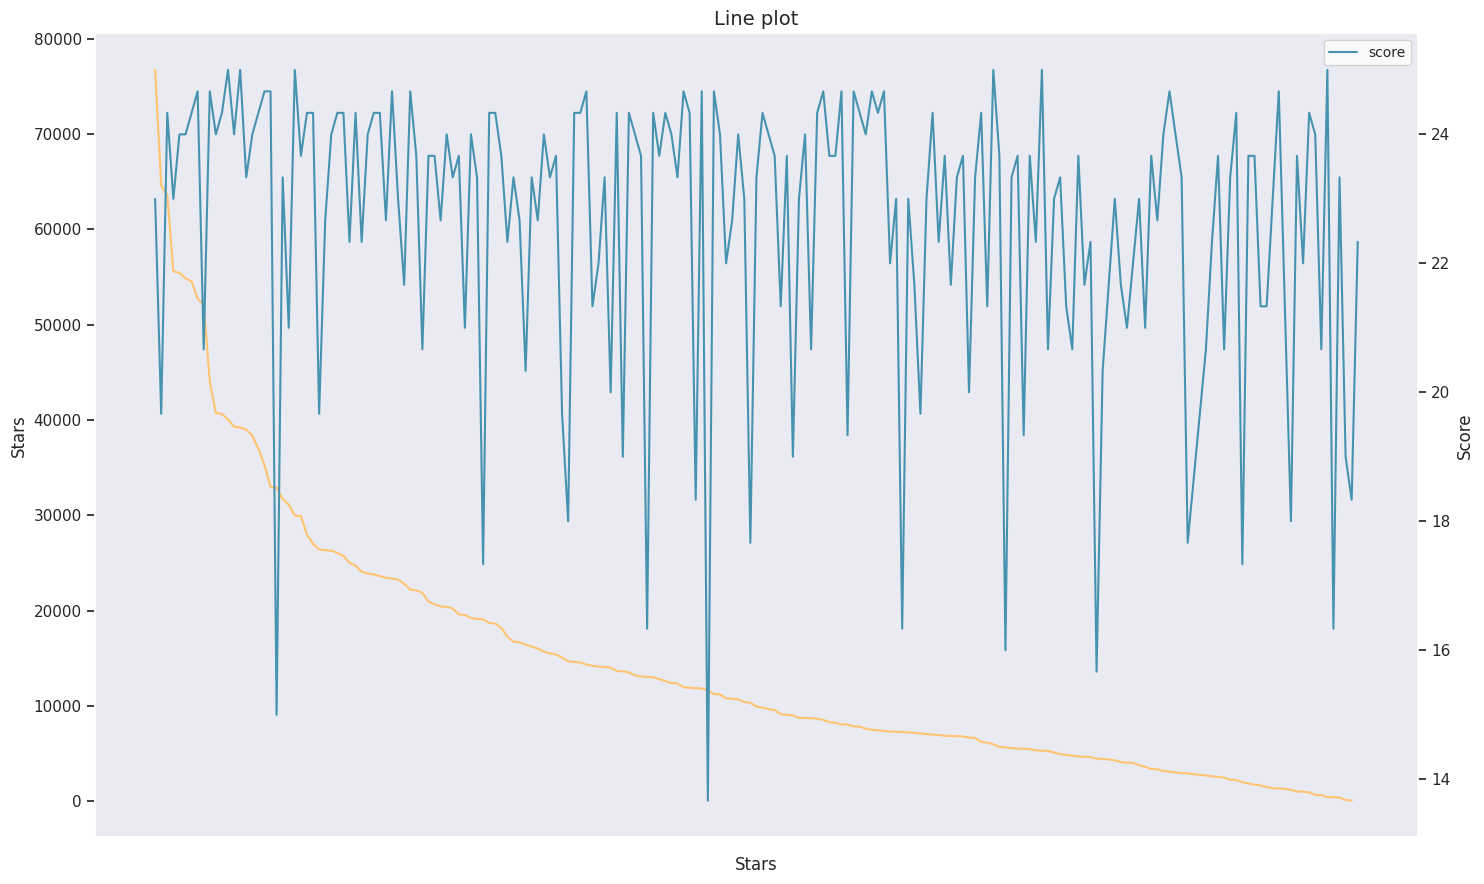

In [823]:
with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax1 = plt.subplots(figsize=(15, 9)) # create a figure and define size of plot

    #y_star = df_plot['stargazers_count'].sort_values(ascending=False)

    # line for stargazers_count
    line1 = ax1.plot(y_star['stargazers_count'].values, label='stars', color='#FFC470')
    ax1.set_ylabel('Stars')
    #ax1.set_ylim(10, 26)

    # line for score_o
    ax2 = ax1.twinx()
    line2 = ax2.plot(y_star['score_o'].values, label='score', color='#4793AF')
    ax2.set_ylabel('Score')
    #ax2.set_ylim(0, 80000)

    # line for forks_count
    # ax3 = ax1.twinx()
    # ax3.spines['right'].set_position(('axes', 1.1))
    # line3, = ax3.plot(x, df_plot['forks_count'], label='forks', color='#DD5746')
    # ax3.set_ylabel('forks', color='#DD5746')
    # ax3.set_ylim(0, 16000)
    # ax3.spines['right'].set_visible(True)

    ax1.set_title('Line plot', fontdict={'fontsize': 14}) # set plot title
    ax1.set_xlabel('Stars') # set x_label
    ax1.set_xticklabels([]) # hides tickl labels for x_axis --> to many repository names to display

    # lines = [line1, line2, line3]
    # labels = [line.get_label() for line in lines]
    # ax1.legend(lines, labels, loc=2, fontsize=10, facecolor='white')

    plt.legend(loc=1, fontsize=10, facecolor='white') # defines legend
    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

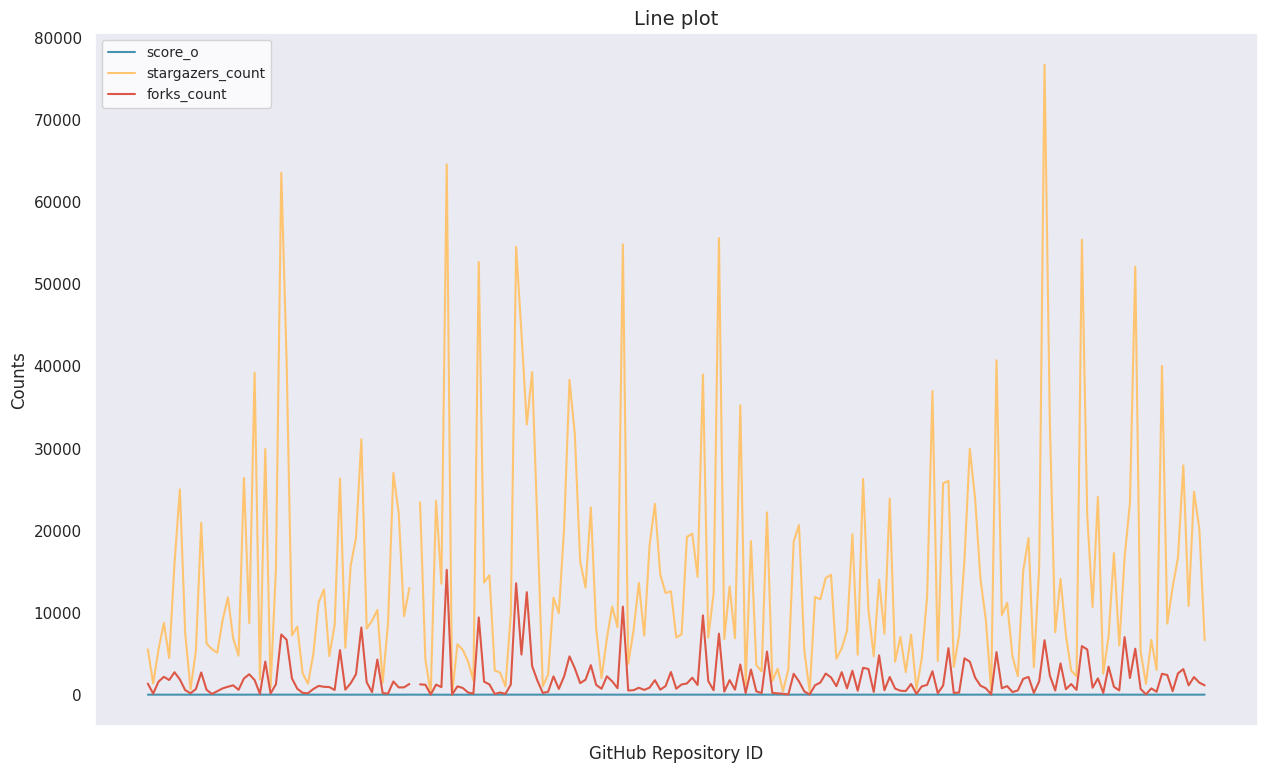

In [824]:
colors = ['#4793AF', '#FFC470', '#DD5746'] # specify colors for numeric columns (source_code_cleaned, comments, formatting)

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(figsize=(15, 9)) # create a figure and define size of plot

    # set repo_name as index (x-axis)
    # plot a stacked bar plot with customized bar width and no edgecolor
    # use colors for parameter color
    df_plot.set_index('id').plot(kind='line', ax=ax, color=colors)

    ax.set_title('Line plot', fontdict={'fontsize': 14}) # set plot title
    ax.set_xlabel('GitHub Repository ID') # set x_label
    ax.set_ylabel('Counts') # set y_labgel
    #ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis)) # applies function format_yaxis to y_axis
    ax.set_xticklabels([]) # hides tickl labels for x_axis --> to many repository names to display
    plt.legend(loc=2, fontsize=10, facecolor='white') # defines legend
    plt.grid(visible=False) # turn of grid
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [825]:
df_llama_o[df_llama_o['license_type'] == 'mit'].describe()

,score_o,stargazers_count,forks_count
count,110.000000,110.000000,110.000000
mean,22.330303,14669.436364,2041.800000
std,2.352042,15487.681595,2656.566556
min,13.666667,407.000000,49.000000
25%,21.333333,3914.500000,477.500000
50%,23.000000,8894.500000,1140.500000
75%,24.000000,19605.500000,2466.000000
max,25.000000,76734.000000,15231.000000


In [826]:
df_llama_o[df_llama_o['license_type'] == 'apache-2.0'].describe()

,score_o,stargazers_count,forks_count
count,68.000000,68.000000,68.000000
mean,22.906863,14515.764706,1793.941176
std,2.122177,11995.381532,1969.560864
min,16.000000,71.000000,32.000000
25%,22.583333,6696.250000,605.750000
50%,23.666667,11013.000000,1209.000000
75%,24.333333,20511.750000,2201.000000
max,25.000000,55613.000000,9673.000000
